In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
uber_15=pd.read_csv('/content/uber-raw-data-janjune-15_sample.csv')

In [ ]:
uber_15.duplicated().sum()

54

In [ ]:
uber_15.drop_duplicates(inplace=True)

In [ ]:
uber_15.duplicated().sum()

0

In [ ]:
uber_15.shape

(99946, 4)

In [ ]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [ ]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [ ]:
type(uber_15['Pickup_date'][0])

str

In [ ]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'])

In [ ]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [ ]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [ ]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
uber_15['Month']=uber_15['Pickup_date'].dt.month_name()

In [ ]:
uber_15['Month'].count()

99946

In [ ]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.hour
uber_15['minute']=uber_15['Pickup_date'].dt.minute

In [ ]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [ ]:
pivot=pd.crosstab(index=uber_15['Month'],columns=uber_15['weekday'])

In [ ]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='Month'>

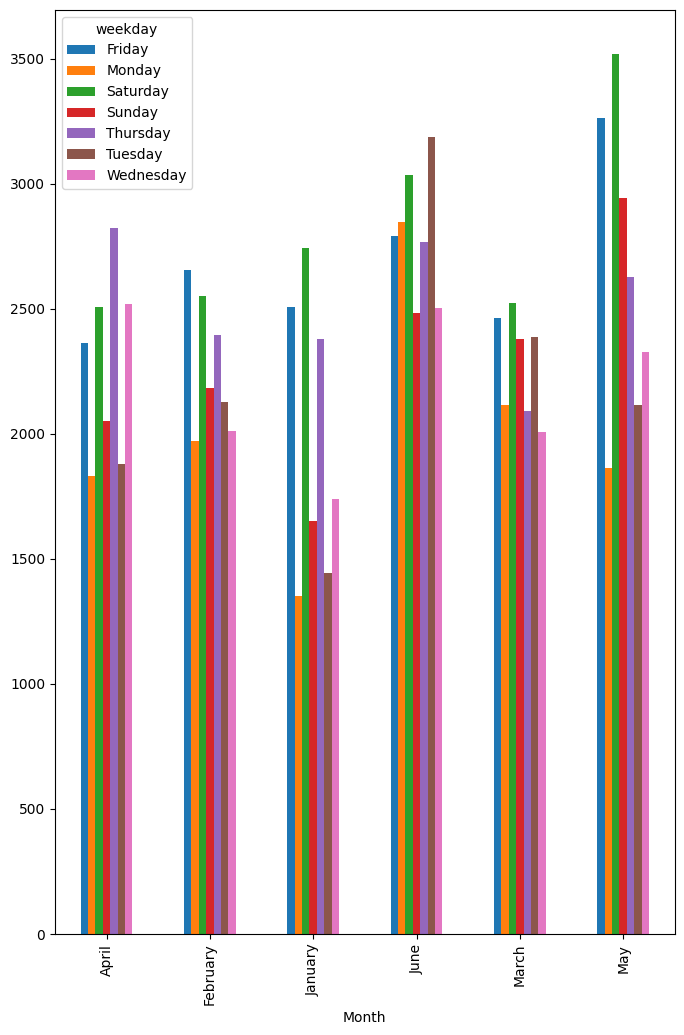

In [ ]:
pivot.plot(kind='bar',figsize=(8,12))

In [ ]:
summary=uber_15.groupby(['weekday','hour'], as_index=False).size()

In [ ]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

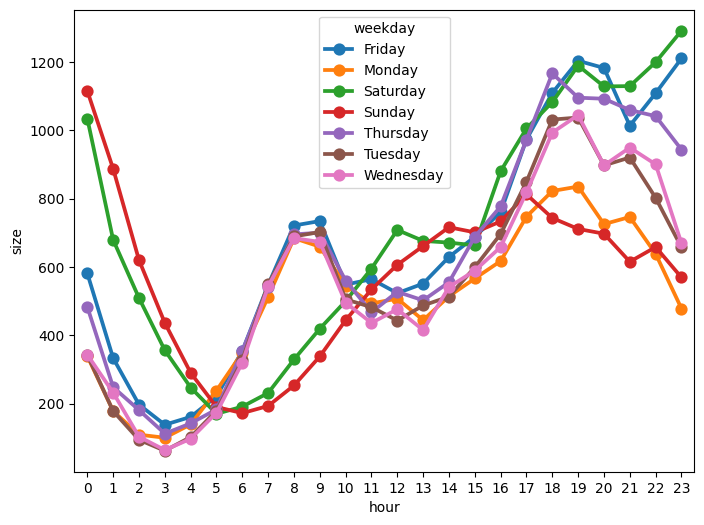

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='hour',y='size',hue='weekday',data=summary)

In [ ]:
uber_foil=pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')

In [ ]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [ ]:
uber_foil.shape

(354, 4)

In [ ]:
uber_foil.head(4)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679


In [ ]:
!pip install chart_studio
!pip install plotly

In [ ]:
import plotly.io as pio


In [ ]:
pio.renderers.default = "colab"

In [ ]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [ ]:
fig=px.box(x='dispatching_base_number', y='active_vehicles',data_frame=uber_foil)
fig.show()

In [ ]:
px.violin(x='dispatching_base_number', y='active_vehicles',data_frame=uber_foil)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.listdir(r'/content/drive/MyDrive/Datasets')

['uber-raw-data-jul14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
files=os.listdir(r'/content/drive/MyDrive/Datasets')

In [ ]:
files

['uber-raw-data-jul14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
final=pd.DataFrame()
path='/content/drive/MyDrive/Datasets'
for file in files:
  current_df=pd.read_csv(path+'/'+file)
  final=pd.concat([current_df,final])

In [ ]:
final.shape

(4534327, 4)

In [ ]:
final.duplicated().sum()

82581

In [ ]:
final.drop_duplicates(inplace=True)

In [ ]:
final.shape

(4451746, 4)

In [ ]:
final.head(4)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512


In [ ]:
rush_uber=final.groupby(['Lat','Lon'], as_index=False).size()

In [ ]:
rush_uber.head(4)

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1


In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
basemap=folium.Map()

In [ ]:
basemap

In [ ]:
from folium.plugins import HeatMap


In [ ]:
HeatMap(rush_uber).add_to(basemap)

In [ ]:
basemap

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
final.head(2)


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512


In [ ]:
final['Date/Time'][0]

0    9/1/2014 0:01:00
0    5/1/2014 0:02:00
0    6/1/2014 0:00:00
0    4/1/2014 0:11:00
0    8/1/2014 0:03:00
0    7/1/2014 0:03:00
Name: Date/Time, dtype: object

In [ ]:
final['Date/Time']=pd.to_datetime(final['Date/Time'],format="%m/%d/%Y %H:%M:%S")

In [ ]:
final['Date/Time'][0]

0   2014-09-01 00:01:00
0   2014-05-01 00:02:00
0   2014-06-01 00:00:00
0   2014-04-01 00:11:00
0   2014-08-01 00:03:00
0   2014-07-01 00:03:00
Name: Date/Time, dtype: datetime64[ns]

In [ ]:
final['day']=final['Date/Time'].dt.day
final['hour']=final['Date/Time'].dt.hour

In [ ]:
final.head(4)

,Date/Time,Lat,Lon,Base,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0


In [ ]:
pivot=final.groupby(['day','hour']).size().unstack()

In [ ]:
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [ ]:
pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [ ]:
def gen_pivot_table(df,col1,col2):
  pivot=final.groupby([col1,col2]).size().unstack()
  return pivot.style.background_gradient()


In [ ]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [ ]:
gen_pivot_table(final,'Lon', 'Base')